In [180]:
library(glmnet)

**1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?**

In [181]:
hit = read.csv("Hitters.csv")
summary(hit)

                X           AtBat            Hits         HmRun      
 -Al Newman      :  1   Min.   : 16.0   Min.   :  1   Min.   : 0.00  
 -Alan Ashby     :  1   1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00  
 -Alan Trammell  :  1   Median :379.5   Median : 96   Median : 8.00  
 -Alan Wiggins   :  1   Mean   :380.9   Mean   :101   Mean   :10.77  
 -Alex Trevino   :  1   3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00  
 -Alfredo Griffin:  1   Max.   :687.0   Max.   :238   Max.   :40.00  
 (Other)         :316                                                
      Runs             RBI             Walks            Years       
 Min.   :  0.00   Min.   :  0.00   Min.   :  0.00   Min.   : 1.000  
 1st Qu.: 30.25   1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000  
 Median : 48.00   Median : 44.00   Median : 35.00   Median : 6.000  
 Mean   : 50.91   Mean   : 48.03   Mean   : 38.74   Mean   : 7.444  
 3rd Qu.: 69.00   3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000  
 Max.   :130.00   Max.   :

We want to omit the categorical variables. We will subset the data to eliminate the following categorical variables:

    X
    League
    Division
    NewLeague

In [182]:
cat_var = c("X", "League", "Division", "NewLeague")
num_var = hit[, !names(hit) %in% cat_var]

We will now eliminate all rows with missing data.

In [183]:
final_hit = num_var[complete.cases(num_var), ]

We will set up our lasso model using the gaussian distribution.

In [184]:
grid = 10^seq(10,-2, length = 100)

In [185]:
x = model.matrix(Salary ~., final_hit)
y = final_hit$Salary

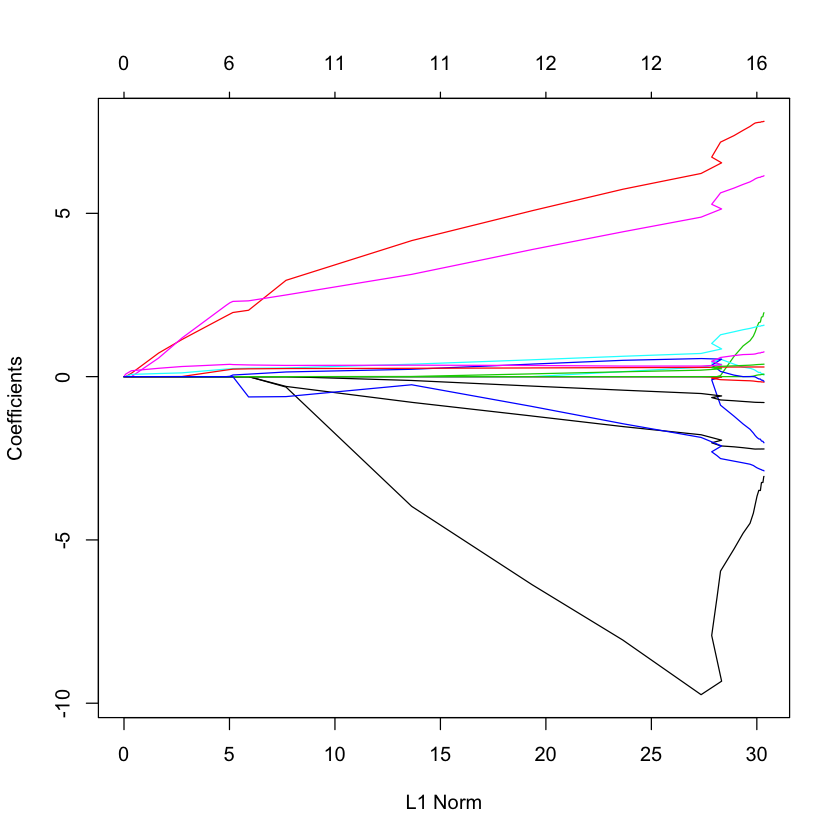

In [186]:
lasso.mod <- glmnet(x, y, alpha = 1, lambda = grid, family = "gaussian")
plot(lasso.mod)

The final three variables left in the model are 'Hits', 'CRuns', and 'CRBI'.

In [187]:
coef_3 = coef(lasso.mod)
coef_3[1:18,65:65]

(Intercept) (Intercept)       AtBat        Hits       HmRun        Runs 
440.6764290   0.0000000   0.0000000   0.1022882   0.0000000   0.0000000 
        RBI       Walks       Years      CAtBat       CHits      CHmRun 
  0.0000000   0.0000000   0.0000000   0.0000000   0.0000000   0.0000000 
      CRuns        CRBI      CWalks     PutOuts     Assists      Errors 
  0.0682917   0.1802305   0.0000000   0.0000000   0.0000000   0.0000000

To choose the optimal lambda, we will use 10-fold cross-validation.

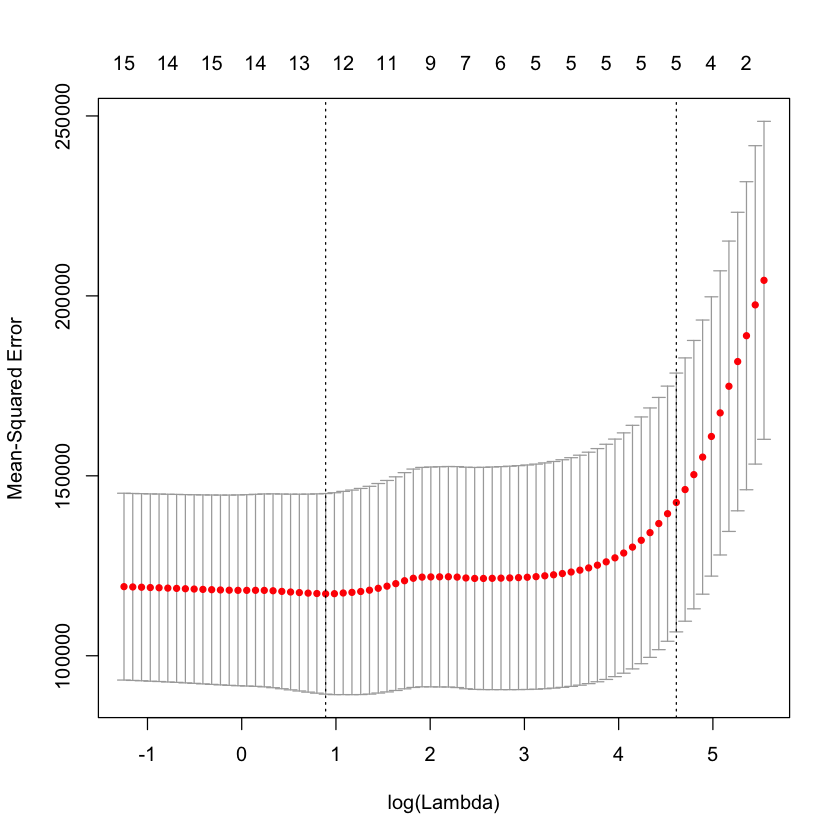

In [192]:
cvfit = cv.glmnet(x, y, family = "gaussian", nfolds = 10, alpha = 1)
plot(cvfit)

Based on the cross-validation, our optimal lambda is approximately 2.437.

In [193]:
bestlam = cvfit$lambda.min
bestlam

[1] 2.436791

Using our optimal lambda, we will now compute a new model.

In [194]:
lasso.bestlam <- glmnet(x, y, alpha = 1, lambda = bestlam, family = "gaussian")

Using the optimal lambda, we have a model with 13 predictors.

In [195]:
coef(lasso.bestlam)

18 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept) 87.2526255011
(Intercept)  .           
AtBat       -1.8458417929
Hits         6.3537907480
HmRun        .           
Runs         .           
RBI          0.3272735873
Walks        5.0001191233
Years       -9.8667205074
CAtBat      -0.0002719695
CHits        .           
CHmRun       0.5830330522
CRuns        0.7355405241
CRBI         0.3151605100
CWalks      -0.5448298338
PutOuts      0.2835274013
Assists      0.2106923725
Errors      -1.9538509806

** 1.2 Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross-validation to find the optimal value of the regularization penalty.**

We will set up our ridge regression model using the gaussian distribution.

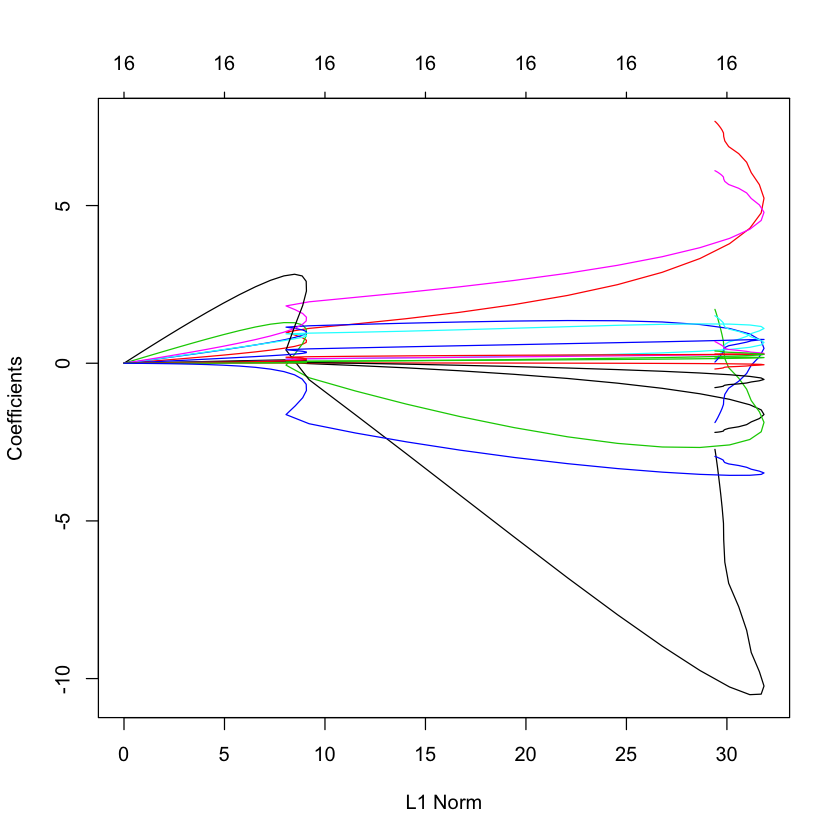

In [196]:
ridg.mod <- glmnet(x, y, alpha = 0, lambda = grid, family = "gaussian")
plot(ridg.mod)

To choose the optimal lambda, we will use 10-fold cross-validation.

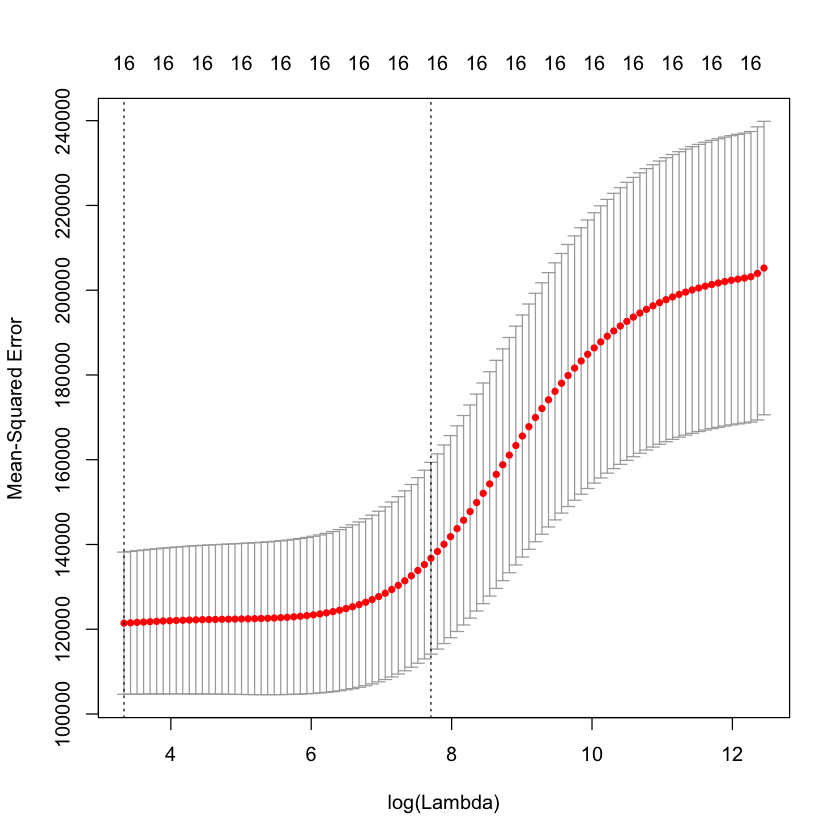

In [204]:
cvfit_ridg = cv.glmnet(x, y, family = "gaussian", nfolds = 10, alpha = 0)
plot(cvfit_ridg)

Based on the cross-validation, our optimal lambda is approximately 28.017.

In [205]:
bestlam_ridg = cvfit_ridg$lambda.min
bestlam_ridg

[1] 28.01718

Using our optimal lambda, we will now compute a new model.

In [206]:
ridg.bestlam <- glmnet(x, y, alpha = 0, lambda = bestlam_ridg, family = "gaussian")

The final coefficients for the ridge regression model show that the predictors 'Hits', 'HmRun', 'Years', and 'Errors' do not appear to be converging to zero.

In [207]:
coef(ridg.bestlam)

18 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept) 27.994796674
(Intercept)  .          
AtBat       -0.723504482
Hits         2.704625066
HmRun       -2.595387301
Runs         1.351260128
RBI          1.226757322
Walks        3.254158738
Years       -8.485766994
CAtBat      -0.001692903
CHits        0.125773172
CHmRun       0.661490023
CRuns        0.297444434
CRBI         0.242310377
CWalks      -0.228174792
PutOuts      0.270173394
Assists      0.169600493
Errors      -3.413387243

**2: Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.**

The bias-variance tradeoff defines the choices a data scientist has in model selection. Ideally, the models we develop for a dataset have low bias and low variance, indicating that they describe the training and testing data well and do not vary greatly from each other. In reality, we will not develop perfect models and must select features in the data to capture. We have two extremes to choose from: 

   1) high bias and low variance (underfitting); or
   
   2) high variance and low bias (overfitting)
    
Based on what we deem necessary in our model, we will move towards one end of the spectrum.

Regularization helps us adjust the balances of bias and varianace within our models. Ridge regression and lasso use regularization to penalize coefficients that may overfit the data. While both seek to minimize error, they introduce some bias to the model. Ultimately, regularization helps models become more generalized, and thereby more applicable to unseen data. 